# Escalamiento de datos numéricos

In [1]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

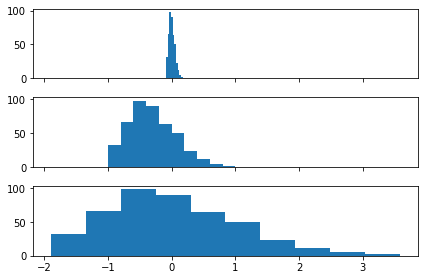

In [2]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [3]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [4]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.13473700000031386 
trainning time for scaled data : 0.06842460000189021
trainning time for z_scaled data : 0.07526630000211298


### Transformaciones no lineales


In [5]:
df = pd.read_csv('cars.csv')


<AxesSubplot:>

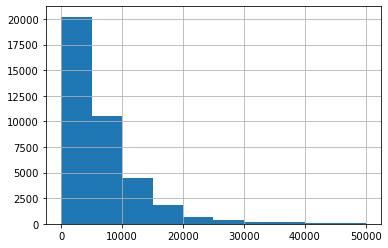

In [6]:
df.price_usd.hist()

<AxesSubplot:>

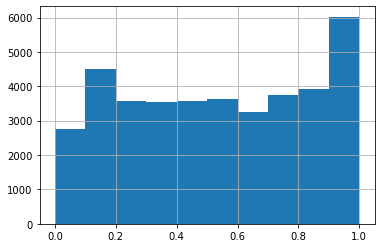

In [7]:
p = 8000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()